# Run 1 : Baseline

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Chargement des données d'apprentissage et de test

In [2]:
df_train = pd.read_csv("../data/train.csv", sep=',', encoding='utf-8')
df_validation = pd.read_csv("../data/validation.csv", sep=',', encoding='utf-8')
df_test = pd.read_csv("../data/test.csv", sep=',', encoding='utf-8')

### Prédiction de manière aléatoire

In [17]:
x = df_train[['titre', 'ingredients','recette']]
y = df_train["type"]

x_test = df_test[['titre', 'ingredients','recette']]
y_test = df_test["type"]

y_pred = np.random.choice(y, size=len(x_test))

#### Résultats

In [18]:
score = accuracy_score(y_pred,y_test)
print("Accuracy:", score, "\n")
print(classification_report(y_test, y_pred), "\n")

Accuracy: 0.3904899135446686 

                precision    recall  f1-score   support

       Dessert       0.34      0.34      0.34       407
        Entrée       0.27      0.26      0.26       337
Plat principal       0.48      0.49      0.49       644

      accuracy                           0.39      1388
     macro avg       0.36      0.36      0.36      1388
  weighted avg       0.39      0.39      0.39      1388
 



<Axes: >

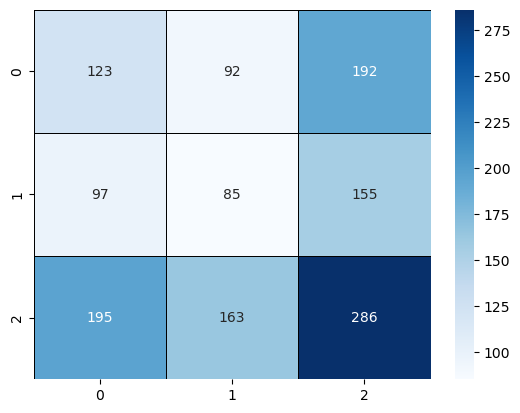

In [15]:
import seaborn as sns 
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black")


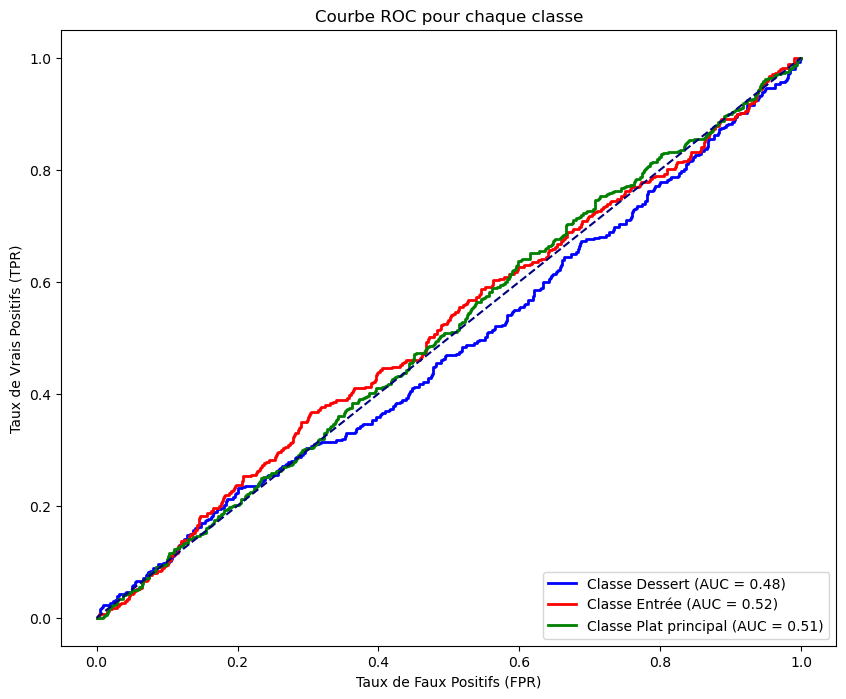

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

lb = LabelBinarizer()
y_test_bin= lb.fit_transform(y_test)
# Remplace ceci par ton propre modèle et ses prédictions de probabilité
model = OneVsRestClassifier(LogisticRegression())
model.fit(np.random.rand(len(y_test), 10), y_test)  # Remplace par ton propre dataset et modèle
y_pred_prob = model.predict_proba(np.random.rand(len(y_test), 10))  # Remplace par les prédictions de probabilité

# Calculer la courbe ROC et l'aire sous la courbe (AUC) pour chaque classe
fpr, tpr, roc_auc = {}, {}, {}
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracer la courbe ROC pour chaque classe
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']  # Choisir des couleurs pour chaque classe
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Classe {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Ajouter la ligne diagonale (AUC = 0.5) pour la référence
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Configurer les labels du graphique
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC pour chaque classe')
plt.legend(loc='lower right')
plt.show()